# Twitter API

## 1. Business Understanding

### 1.1 Overview

### 1.2 Problem Statement

### 1.3 Business Objectives

### 1.4 Business Success Criteria

## 2. Data Understanding

### 2.1 Collecting the Data

In [3]:
#Importing the libraries
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import snscrape.modules.twitter as sntwitter
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
import warnings
import re 
import string
import wordninja 
from textblob import Word
from textblob import TextBlob
import matplotlib.pyplot as plt
from wordcloud import WordCloud
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to /Users/user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
# maxTweets = 20000
# # Creating list to append tweet data to
# tweets_list2 = []
# # Using TwitterSearchScraper to scrape data and append tweets to list
# for i,tweet in enumerate(sntwitter.TwitterSearchScraper('Safaricom_Care since:2016-01-01 until:2022-12-15').get_items()):
#     if i>maxTweets:
#         break
#     tweets_list2.append([tweet.date, tweet.id, tweet.content, tweet.username])
# # Creating a dataframe from the tweets list above
# tweets_df = pd.DataFrame(tweets_list2, columns=['Datetime', 'Tweet Id', 'Text', 'Username'])
# tweets_df.to_csv("tweets.csv", index = False)

In [5]:
#Loading the data set
tweets_df = pd.read_csv('1MillTweets.csv')
tweets_df.head()

,Datetime,Tweet Id,Text,Username,LikeCount
0,2022-12-14 23:47:00+00:00,1603174748451733504,Ditto @Safaricom_Care https://t.co/SgK6L3YQhd,OnguruMeister,0
1,2022-12-14 23:41:18+00:00,1603173313052037120,"@ital_john Hello John, the deadline was Octobe...",Safaricom_Care,0
2,2022-12-14 23:35:29+00:00,1603171849428508673,@missy_k32 @AbdulahiAdan10 @Safaricom_Care @be...,I_im_kibagendi,0
3,2022-12-14 23:34:57+00:00,1603171716594692096,"@Safaricom_Care, @SafaricomPLC we demand you ...",MutonyeMutuku_,2
4,2022-12-14 23:19:59+00:00,1603167951682764800,"Hey @Safaricom_Care @SafaricomPLC ,15th Decemb...",ndungujosephn,0


### 2.2 Describing the Data

#### 2.2.1 Description of the columns in the data set:

> * Datetime - This refers to the date of the tweet

> * Tweet Id - This refers to the unique id of the tweet

> * Text - This refers to the actual text in the tweet

> * Username - This refers to the name of the user who commented

> * Like Count -This refers to the number of likes a tweet receives

#### 2.2.2 Description of the size, statistics and data type

In [6]:
# creating a class that we will use to describe the data

class describing_the_data(object):
      def __init__(self, df):
        self.info = df.info
        self.shape = df.shape
        self.describe = df.describe()
        self.duplicates = df.duplicated().sum()
        self.missing = df.isna().sum()

In [7]:
#Instantiating the class
data_description = describing_the_data(tweets_df)

In [8]:
# describe the data type of the columns
data_description.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000001 entries, 0 to 1000000
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   Datetime   1000001 non-null  object
 1   Tweet Id   1000001 non-null  int64 
 2   Text       1000001 non-null  object
 3   Username   1000001 non-null  object
 4   LikeCount  1000001 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 38.1+ MB


In [9]:
#shape of the data
data_description.shape

(1000001, 5)

In [10]:
#descriptive statistics of the data
data_description.describe

,Tweet Id,LikeCount
count,1.000001e+06,1.000001e+06
mean,1.342273e+18,7.958292e-01
std,1.550978e+17,2.739744e+01
min,1.055776e+18,0.000000e+00
25%,1.226837e+18,0.000000e+00
50%,1.322460e+18,0.000000e+00
75%,1.475853e+18,0.000000e+00
max,1.603175e+18,1.028200e+04


In [11]:
#checking for duplicates
data_description.duplicates

0

In [12]:
#checking for missing values
data_description.missing

Datetime     0
Tweet Id     0
Text         0
Username     0
LikeCount    0
dtype: int64

In [13]:
# pd.options.display.max_columns = 27

# import itertools
# pd.DataFrame(itertools.islice(sntwitter.TwitterSearchScraper(
#     'Safaricom_Care since:2016-01-01 until:2022-12-15').get_items(), 2))


## 3. Data Preparation

### 3.1 Data Cleaning

In [14]:
#Removing Tweets by Safaricom in order to have tweets from their customers only
tweets_df = tweets_df[tweets_df['Username'] != 'Safaricom_Care']

In [15]:
#Instantiating the class
data_description_2 = describing_the_data(tweets_df)

In [16]:
data_description_2.shape

(740364, 5)

In [17]:
# Defining functions to clean data
def lower_case(tweet):
    tweet = tweet.lower() 
    return tweet

# def tokenization(tweet):
#     tweet = tweet.split() 

# def 

def remove_links(tweet):
    tweet = re.sub(r"https\S+"," ",tweet) #removes weblinks
    tweet = re.sub(r"bit.ly/\S+", " ",tweet) #removes weblinks
    return tweet

def remove_user(tweet):
    tweet = re.sub('(rt\s@[a-z]+[a-z0-9-_]+)', '',str(tweet)) #removes @user information
    tweet = re.sub('(@[a-z]+[a-z0-9-_]+)', '',str(tweet))#removes @user information
    return tweet

    # tweet = re.sub("(sxsw)"," ",tweet)
    # tweet = re.sub("(link)"," ",tweet)
# def remove_user(tweet):
#     tweet = re.sub('(rt\s@[a-z]+[a-z0-9-_]+)', '',tweet) #removes @user information
#     tweet = re.sub('(@[a-z]+[a-z0-9-_]+)', '',tweet) #removes @user information
#     # tweet = re.sub("(sxsw)"," ",tweet)
#     # tweet = re.sub("(link)"," ",tweet)
   
def remove_hashtags(tweet):
    tweeet = re.sub('(#[a-z]+[a-z0-9-_]+)', '',tweet) #removes the hashtags
    return tweet
def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

# def remove_stopwords(tweet):
#     stop_words = stopwords.words('english')
#     new_stopwords = ["dm", "check", "kindly", "please", "na" , "ni", "get" , "ya", "hello", "still", "need", "cant", "help", 
#                  "even","hey", "like", "issue", "whats", "hii", "since", "hi", "kwa", "using", "dont", "assist", "im", "know", 
#                  "people", "someone", "thanks", "thank", "waiting", "today", "ive", "want", "us", "use", "ama", "without", 
#                  "trying", "guys", "happening"]
#     stop_words.extend(new_stopwords)
#     tweet = tweet.join(word for word in tweet.split () if word not in (stop_words))
#     return tweet

def basic_clean(tweet):
    """Returns cleaned data, remove punctuation and numbers"""
    tweet = lower_case(tweet)
#     tweet = tokenization(tweet)
    tweet = remove_user(tweet)
    tweet = remove_links(tweet)
    tweet = remove_hashtags(tweet)
    tweet = deEmojify(tweet)
#     tweet = remove_stopwords(tweet)
    tweet = re.sub('['+ string.punctuation+ ']+', '',tweet) # Removes punctuation
    tweet = re.sub('([0-9]+)'," ",tweet) # Removes numbers
    return tweet


In [18]:
#creating a new column with the clean tweets
clean_data=[]
for i in tweets_df["Text"]:
    clean_data.append(basic_clean(i))

tweets_df['Clean_Tweets']=clean_data
    

In [19]:
tweets_df.head()

,Datetime,Tweet Id,Text,Username,LikeCount,Clean_Tweets
0,2022-12-14 23:47:00+00:00,1603174748451733504,Ditto @Safaricom_Care https://t.co/SgK6L3YQhd,OnguruMeister,0,ditto
2,2022-12-14 23:35:29+00:00,1603171849428508673,@missy_k32 @AbdulahiAdan10 @Safaricom_Care @be...,I_im_kibagendi,0,i can see you have started and clearly thi...
3,2022-12-14 23:34:57+00:00,1603171716594692096,"@Safaricom_Care, @SafaricomPLC we demand you ...",MutonyeMutuku_,2,we demand you issue a statement concerning ...
4,2022-12-14 23:19:59+00:00,1603167951682764800,"Hey @Safaricom_Care @SafaricomPLC ,15th Decemb...",ndungujosephn,0,hey th december is my birthday i can see it...
5,2022-12-14 23:00:12+00:00,1603162972456640517,@enockmogaka7 @SafaricomPLC @Safaricom_Care Th...,cellestialtech,0,the man is dead you buggers still holding ...


In [20]:
df = tweets_df[['Datetime','Tweet Id', 'Username', 'Clean_Tweets']]
df.head()

,Datetime,Tweet Id,Username,Clean_Tweets
0,2022-12-14 23:47:00+00:00,1603174748451733504,OnguruMeister,ditto
2,2022-12-14 23:35:29+00:00,1603171849428508673,I_im_kibagendi,i can see you have started and clearly thi...
3,2022-12-14 23:34:57+00:00,1603171716594692096,MutonyeMutuku_,we demand you issue a statement concerning ...
4,2022-12-14 23:19:59+00:00,1603167951682764800,ndungujosephn,hey th december is my birthday i can see it...
5,2022-12-14 23:00:12+00:00,1603162972456640517,cellestialtech,the man is dead you buggers still holding ...


In [21]:
df['Datetime'] = pd.to_datetime(df['Datetime'])

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 740364 entries, 0 to 1000000
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype              
---  ------        --------------   -----              
 0   Datetime      740364 non-null  datetime64[ns, UTC]
 1   Tweet Id      740364 non-null  int64              
 2   Username      740364 non-null  object             
 3   Clean_Tweets  740364 non-null  object             
dtypes: datetime64[ns, UTC](1), int64(1), object(2)
memory usage: 28.2+ MB


In [22]:
df["hour"] = df["Datetime"].apply(lambda x: x.hour)
df.head()

,Datetime,Tweet Id,Username,Clean_Tweets,hour
0,2022-12-14 23:47:00+00:00,1603174748451733504,OnguruMeister,ditto,23
2,2022-12-14 23:35:29+00:00,1603171849428508673,I_im_kibagendi,i can see you have started and clearly thi...,23
3,2022-12-14 23:34:57+00:00,1603171716594692096,MutonyeMutuku_,we demand you issue a statement concerning ...,23
4,2022-12-14 23:19:59+00:00,1603167951682764800,ndungujosephn,hey th december is my birthday i can see it...,23
5,2022-12-14 23:00:12+00:00,1603162972456640517,cellestialtech,the man is dead you buggers still holding ...,23


In [23]:
def get_time(hour):
    if hour >=6 and hour < 12:
         return 'Morning'
    if hour > 12 and hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'

In [24]:
df['Time_of_Day'] = df['hour'].apply(get_time)
df['Time_of_Day'].value_counts()

Morning      290148
Evening      226615
Afternoon    223601
Name: Time_of_Day, dtype: int64

In [25]:
# # Splitting concatenated words into separate words 
# df["Clean_Tweets"] = df.Clean_Tweets.apply(lambda x: wordninja.split(str(TextBlob(x))))  
# df["Clean_Tweets"] = df.Clean_Tweets.str.join(' ')
# df["Clean_Tweets"].head()

In [26]:
#Removing stopwords
stop_words = stopwords.words('english')
new_stopwords = ["dm", "check", "kindly", "please", "na" , "ni", "get" , "ya", "hello", "still", "need", "cant", "help", 
                 "even","hey", "like", "issue", "whats", "hii", "since", "hi", "kwa", "using", "dont", "assist", "im", "know", 
                 "people", "someone", "thanks", "thank", "waiting", "today", "ive", "want", "us", "use", "ama", "without", 
                 "trying", "guys", "happening"]
stop_words.extend(new_stopwords)
df["Clean_Tweets"] = df["Clean_Tweets"].apply(lambda x: ' '.join(word for word in x.split () if word not in (stop_words)))
df.head()

,Datetime,Tweet Id,Username,Clean_Tweets,hour,Time_of_Day
0,2022-12-14 23:47:00+00:00,1603174748451733504,OnguruMeister,ditto,23,Evening
2,2022-12-14 23:35:29+00:00,1603171849428508673,I_im_kibagendi,see started clearly show boychild misses funda...,23,Evening
3,2022-12-14 23:34:57+00:00,1603171716594692096,MutonyeMutuku_,demand statement concerning maxine wahome youv...,23,Evening
4,2022-12-14 23:19:59+00:00,1603167951682764800,ndungujosephn,th december birthday see something data bundle...,23,Evening
5,2022-12-14 23:00:12+00:00,1603162972456640517,cellestialtech,man dead buggers holding sponsorship maxinewah...,23,Evening


In [27]:
ls2=[]
for i in df["Clean_Tweets"]:
    ls2.append(basic_clean(i))

df['Clean_Tweets']=ls2

df

,Datetime,Tweet Id,Username,Clean_Tweets,hour,Time_of_Day
0,2022-12-14 23:47:00+00:00,1603174748451733504,OnguruMeister,ditto,23,Evening
2,2022-12-14 23:35:29+00:00,1603171849428508673,I_im_kibagendi,see started clearly show boychild misses funda...,23,Evening
3,2022-12-14 23:34:57+00:00,1603171716594692096,MutonyeMutuku_,demand statement concerning maxine wahome youv...,23,Evening
4,2022-12-14 23:19:59+00:00,1603167951682764800,ndungujosephn,th december birthday see something data bundle...,23,Evening
5,2022-12-14 23:00:12+00:00,1603162972456640517,cellestialtech,man dead buggers holding sponsorship maxinewah...,23,Evening
...,...,...,...,...,...,...
999996,2018-10-26 11:00:21+00:00,1055776139237568512,vincegfxpert,god knows happened quick responses forget,11,Morning
999997,2018-10-26 10:58:57+00:00,1055775786958024704,KThefirst,saf hamjawai nipromote si mfanye ivyo woiye na...,10,Morning
999998,2018-10-26 10:58:36+00:00,1055775697233424384,gimwesh,havent received promotion used safaricom yrs,10,Morning
999999,2018-10-26 10:58:27+00:00,1055775662072623105,hbograndmaster,chenye nishawahi shinda tu njaa,10,Morning


In [28]:
freq = pd.Series(' '.join(df.Clean_Tweets).split()).value_counts()[200:250]
freq

mb              3922
mobile          3912
shop            3901
say             3887
end             3870
taking          3859
text            3821
assistance      3820
bank            3785
true            3785
transactions    3779
thing           3703
n               3700
register        3700
support         3679
cost            3668
it’s            3668
offer           3664
confirm         3660
daily           3658
person          3634
ok              3623
lines           3620
doesnt          3593
place           3496
statement       3481
ethiopian       3455
kenyans         3444
okay            3441
wait            3438
contact         3427
hope            3415
advise          3404
kwani           3378
mtu             3374
saf             3368
poor            3365
refund          3354
loan            3353
asap            3353
happened        3334
ata             3322
coz             3320
must            3311
tigray          3309
follow          3300
youre           3295
code         

In [29]:
mpesa = {"pesa", "m-pesa", "esa", "send money", "mpesa", "money", "till", "fuliza", "reverse", "transaction", 
         "transactions" "reversal" , "agent", "paybill", "buygoods", "statement", "loan", "bank", "cash", "recipient", 
         "mshwari", "withdraw","lipa", "reversed", "sentmoney", "kcb", "pay", "pochi", "pochilabiashara", "refund"}
voice = {"credit", "card",'credo', "okoa","credit", "airtime", "call", "minutes", "calls", "phone", "jahazi"}
internet = {"fibre", "fiber", "faiba",'safaricom home', "data", "internet", "bundles", "bundle", "network", "gb", "wifi", 
            "connection", "youtube", "net", "mbps", "mbs", "mb", "hanging"}
valueaddedservices = {"bonga", "daima" , "lipamdogomdogo", "hustler", "points", "customerobsessionmonth", "twendetukiuke" , 
                      "safaricomforyou", "uteowafuraha", "birthday", "app", "zuri", "csmonth", "tuinuane"}
customercare = {"simcards", "customer", "service", "customerservice", "poor", "problem", "register", "registration", 
                "registered", "scam", "sim"}
def label_tweet(tweet):
    if mpesa.intersection(tweet.split(" ")):
        return "mpesa"
    elif internet.intersection(tweet.split(" ")):
        return "internet"
    elif voice.intersection(tweet.split(" ")):
        return "voice"
    elif valueaddedservices.intersection(tweet.split(" ")):
        return "valueaddedservices"
    elif customercare.intersection(tweet.split(" ")):
        return "customercare"
    else:
        return "general"
# Add a new column to the dataframe with the labels for each tweet
df["Category"] = df['Clean_Tweets'].apply(label_tweet)
df["Category"].value_counts()


general               375824
mpesa                 120746
valueaddedservices     88090
internet               87654
voice                  43847
customercare           24203
Name: Category, dtype: int64

In [30]:
df["Clean_Tweets"] = df.Clean_Tweets.apply(lambda x: x if len(x.split()) > 3 else None)
df = df.dropna()
df

,Datetime,Tweet Id,Username,Clean_Tweets,hour,Time_of_Day,Category
2,2022-12-14 23:35:29+00:00,1603171849428508673,I_im_kibagendi,see started clearly show boychild misses funda...,23,Evening,general
3,2022-12-14 23:34:57+00:00,1603171716594692096,MutonyeMutuku_,demand statement concerning maxine wahome youv...,23,Evening,mpesa
4,2022-12-14 23:19:59+00:00,1603167951682764800,ndungujosephn,th december birthday see something data bundle...,23,Evening,internet
5,2022-12-14 23:00:12+00:00,1603162972456640517,cellestialtech,man dead buggers holding sponsorship maxinewah...,23,Evening,general
6,2022-12-14 22:58:45+00:00,1603162608898637824,LuckySa89737923,kumbe hizi bundles za saf huwa scam thought zi...,22,Evening,internet
...,...,...,...,...,...,...,...
999996,2018-10-26 11:00:21+00:00,1055776139237568512,vincegfxpert,god knows happened quick responses forget,11,Morning,general
999997,2018-10-26 10:58:57+00:00,1055775786958024704,KThefirst,saf hamjawai nipromote si mfanye ivyo woiye na...,10,Morning,general
999998,2018-10-26 10:58:36+00:00,1055775697233424384,gimwesh,havent received promotion used safaricom yrs,10,Morning,general
999999,2018-10-26 10:58:27+00:00,1055775662072623105,hbograndmaster,chenye nishawahi shinda tu njaa,10,Morning,general


In [31]:
# pd.options.display.max_colwidth = 300
# pd.options.display.max_rows = 100
# df.head(100)

### 3.2 Exploratory Data Analysis

#### 3.2.1 Univariate Data Analysis

In [32]:

def count_plot(df,column):
        plt.figure(figsize=(16,8))
        sns.countplot(x=column,data=df, order=df[column].value_counts().iloc[:5].index, palette='BuPu')
        plt.title(f'{column}')
        plt.xlabel(column)
        plt.xticks(rotation=90)
        plt.show();

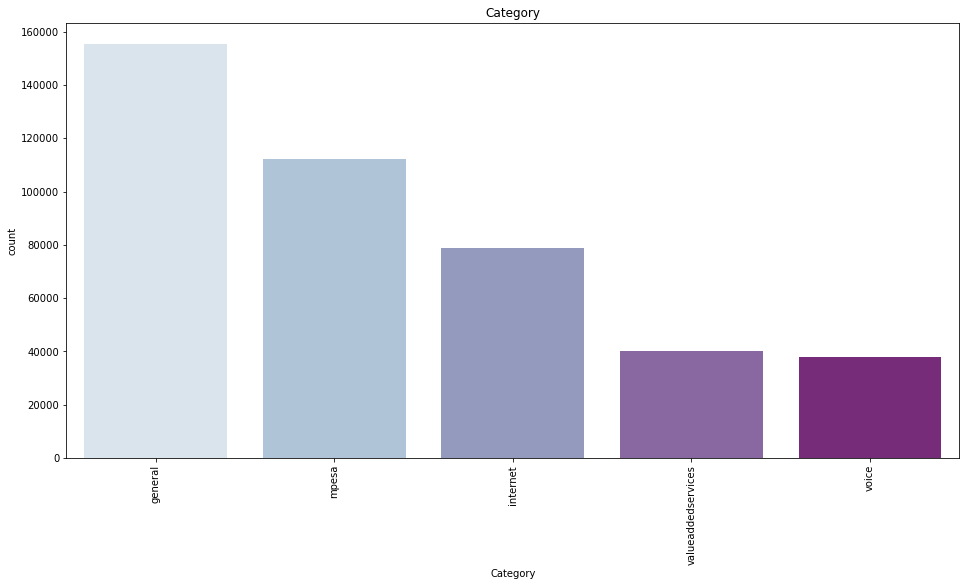

In [33]:
count_plot(df, 'Category')

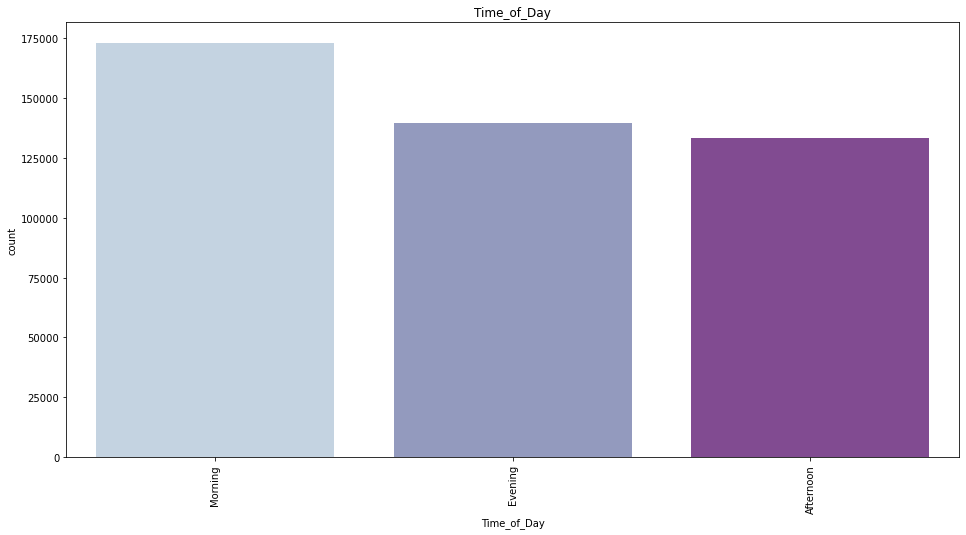

In [34]:
count_plot(df, 'Time_of_Day')

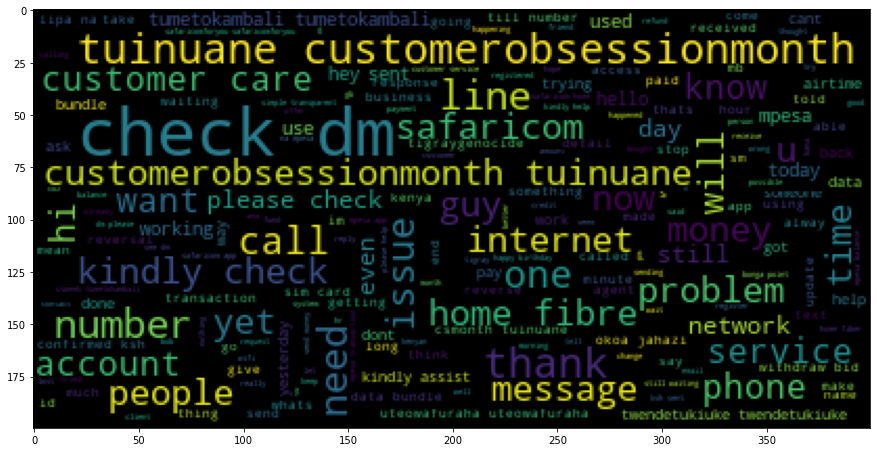

In [35]:
sentences = tweets_df['Clean_Tweets'].tolist()
sentences_ss = " ".join(sentences)

plt.figure(figsize=(15,15))
# plt.imshow(WordCloud(background_color='white',mask=twitter_mask).generate(sentences_ss))
plt.imshow(WordCloud().generate(sentences_ss))

#### 3.2.2 Bivariate Data Analysis

(array([0, 1, 2]),
 [Text(0, 0, 'Evening'), Text(1, 0, 'Afternoon'), Text(2, 0, 'Morning')])

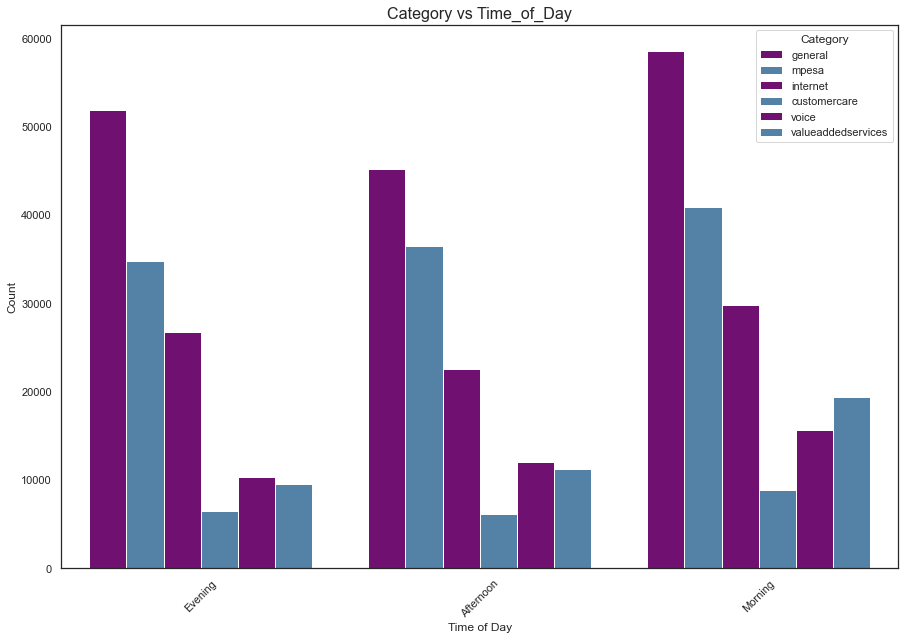

In [36]:
plt.figure(figsize=(15,10))

#set seaborn plotting aesthetics
sns.set(style='white')

#create grouped bar chart
sns.countplot(x='Time_of_Day', hue='Category', data=df,
            palette=['purple', 'steelblue'])

#add overall title
plt.title('Category vs Time_of_Day', fontsize=16)

#add axis titles
plt.xlabel('Time of Day')
plt.ylabel('Count')

#rotate x-axis labels
plt.xticks(rotation=45)

In [37]:
categories = df.groupby('Category')

categories.head()

,Datetime,Tweet Id,Username,Clean_Tweets,hour,Time_of_Day,Category
2,2022-12-14 23:35:29+00:00,1603171849428508673,I_im_kibagendi,see started clearly show boychild misses funda...,23,Evening,general
3,2022-12-14 23:34:57+00:00,1603171716594692096,MutonyeMutuku_,demand statement concerning maxine wahome youv...,23,Evening,mpesa
4,2022-12-14 23:19:59+00:00,1603167951682764800,ndungujosephn,th december birthday see something data bundle...,23,Evening,internet
5,2022-12-14 23:00:12+00:00,1603162972456640517,cellestialtech,man dead buggers holding sponsorship maxinewah...,23,Evening,general
6,2022-12-14 22:58:45+00:00,1603162608898637824,LuckySa89737923,kumbe hizi bundles za saf huwa scam thought zi...,22,Evening,internet
9,2022-12-14 22:49:19+00:00,1603160231541891072,BilhaMutuli,⁦⁩ ⁦⁩ can’t top new line uaing different numbe...,22,Evening,general
11,2022-12-14 22:11:11+00:00,1603150636937367553,friendofanation,disappointed poor customer service,22,Evening,customercare
12,2022-12-14 22:08:50+00:00,1603150043619508225,Blvcklantern,night bundle reflecting io n pesa yangu mnaiba...,22,Evening,mpesa
13,2022-12-14 22:07:03+00:00,1603149596145991680,friendofanation,urgently speak agent tight spot customer care ...,22,Evening,mpesa
14,2022-12-14 22:05:08+00:00,1603149112718901249,OscarKimani,mpesa business customer underatand charged mpe...,22,Evening,mpesa


In [38]:
general = categories.get_group('general')

general.head(5)

,Datetime,Tweet Id,Username,Clean_Tweets,hour,Time_of_Day,Category
2,2022-12-14 23:35:29+00:00,1603171849428508673,I_im_kibagendi,see started clearly show boychild misses funda...,23,Evening,general
5,2022-12-14 23:00:12+00:00,1603162972456640517,cellestialtech,man dead buggers holding sponsorship maxinewah...,23,Evening,general
9,2022-12-14 22:49:19+00:00,1603160231541891072,BilhaMutuli,⁦⁩ ⁦⁩ can’t top new line uaing different numbe...,22,Evening,general
15,2022-12-14 22:04:44+00:00,1603149013762580487,friendofanation,reach taken circles disappointed,22,Evening,general
16,2022-12-14 22:03:58+00:00,1603148821084753921,njagamugo,confirmed dead read somewhere life support,22,Evening,general


In [39]:
general["Clean_Tweets"] = general.Clean_Tweets.apply(lambda x: x if len(x.split()) > 3 else None)
general = general.dropna()
general

,Datetime,Tweet Id,Username,Clean_Tweets,hour,Time_of_Day,Category
2,2022-12-14 23:35:29+00:00,1603171849428508673,I_im_kibagendi,see started clearly show boychild misses funda...,23,Evening,general
5,2022-12-14 23:00:12+00:00,1603162972456640517,cellestialtech,man dead buggers holding sponsorship maxinewah...,23,Evening,general
9,2022-12-14 22:49:19+00:00,1603160231541891072,BilhaMutuli,⁦⁩ ⁦⁩ can’t top new line uaing different numbe...,22,Evening,general
15,2022-12-14 22:04:44+00:00,1603149013762580487,friendofanation,reach taken circles disappointed,22,Evening,general
16,2022-12-14 22:03:58+00:00,1603148821084753921,njagamugo,confirmed dead read somewhere life support,22,Evening,general
...,...,...,...,...,...,...,...
999996,2018-10-26 11:00:21+00:00,1055776139237568512,vincegfxpert,god knows happened quick responses forget,11,Morning,general
999997,2018-10-26 10:58:57+00:00,1055775786958024704,KThefirst,saf hamjawai nipromote si mfanye ivyo woiye na...,10,Morning,general
999998,2018-10-26 10:58:36+00:00,1055775697233424384,gimwesh,havent received promotion used safaricom yrs,10,Morning,general
999999,2018-10-26 10:58:27+00:00,1055775662072623105,hbograndmaster,chenye nishawahi shinda tu njaa,10,Morning,general


In [40]:
freq = pd.Series(' '.join(general.Clean_Tweets).split()).value_counts()[:50]
freq

tumetokambali     14117
safaricom         14079
number             8926
one                6355
line               5921
messages           4960
time               4924
amp                4141
stop               3955
nawekilawakati     3822
day                3578
simple             3483
account            3291
honest             3250
transparent        3210
good               3076
tigraygenocide     2980
tu                 2885
never              2830
back               2804
yet                2780
message            2768
kama               2678
sent               2671
services           2454
send               2425
si                 2419
response           2410
take               2401
new                2369
days               2338
details            2331
getting            2330
used               2302
way                2297
keep               2251
long               2226
see                2203
would              2185
business           2171
go                 2162
mimi            

In [41]:
general.to_csv('general.csv', index=False)

In [122]:
mpesa = categories.get_group('mpesa')
mpesa = mpesa[:20000]
mpesa

,Datetime,Tweet Id,Username,Clean_Tweets,hour,Time_of_Day,Category,cat_num
3,2022-12-14 23:34:57+00:00,1603171716594692096,MutonyeMutuku_,demand statement concerning maxine wahome youv...,23,Evening,mpesa,3
12,2022-12-14 22:08:50+00:00,1603150043619508225,Blvcklantern,night bundle reflecting io n pesa yangu mnaiba...,22,Evening,mpesa,3
13,2022-12-14 22:07:03+00:00,1603149596145991680,friendofanation,urgently speak agent tight spot customer care ...,22,Evening,mpesa,3
14,2022-12-14 22:05:08+00:00,1603149112718901249,OscarKimani,mpesa business customer underatand charged mpe...,22,Evening,mpesa,3
48,2022-12-14 20:37:49+00:00,1603127140869734400,BwigMytch,something wrong woth mpesa app pay buying credit,20,Evening,mpesa,3
...,...,...,...,...,...,...,...,...
195398,2022-04-02 13:50:38+00:00,1510253375304122371,nathathaye,line big mpesa balance happens cash,13,Afternoon,mpesa,3
195399,2022-04-02 13:50:34+00:00,1510253360456294402,DanSonko,cannot accessuse mpesa global pops whenever se...,13,Afternoon,mpesa,3
195410,2022-04-02 13:39:38+00:00,1510250606367281155,TseLopLe,one isn’t country roaming till said deadline,13,Afternoon,mpesa,3
195411,2022-04-02 13:39:03+00:00,1510250461533806608,Kimttai,mpesa agents asking money registration,13,Afternoon,mpesa,3


In [121]:
general= general[:20000]
general

,Datetime,Tweet Id,Username,Clean_Tweets,hour,Time_of_Day,Category,cat_num
2,2022-12-14 23:35:29+00:00,1603171849428508673,I_im_kibagendi,see started clearly show boychild misses funda...,23,Evening,general,1
5,2022-12-14 23:00:12+00:00,1603162972456640517,cellestialtech,man dead buggers holding sponsorship maxinewah...,23,Evening,general,1
9,2022-12-14 22:49:19+00:00,1603160231541891072,BilhaMutuli,⁦⁩ ⁦⁩ can’t top new line uaing different numbe...,22,Evening,general,1
15,2022-12-14 22:04:44+00:00,1603149013762580487,friendofanation,reach taken circles disappointed,22,Evening,general,1
16,2022-12-14 22:03:58+00:00,1603148821084753921,njagamugo,confirmed dead read somewhere life support,22,Evening,general,1
...,...,...,...,...,...,...,...,...
146106,2022-05-31 13:10:03+00:00,1531624046789644289,shebajames2,lazima ikue simcard fam think js another way,13,Afternoon,general,1
146107,2022-05-31 13:09:58+00:00,1531624025167994881,AlvineInanga,sir living villages ksh reach safaricom shop w...,13,Afternoon,general,1
146116,2022-05-31 13:00:50+00:00,1531621726093713408,Rael_l_,sina account thought uko account,13,Afternoon,general,1
146118,2022-05-31 12:58:37+00:00,1531621167861313541,hayo_machache,vested interests broadcasting message otherwis...,12,Evening,general,1


In [ ]:
general               155486
mpesa                 112060
internet               78976
valueaddedservices     40132
voice                  38074
customercare           21348
Name: Category, dtype: int64

In [120]:
valueaddedservices = categories.get_group('valueaddedservices')[:20000]  
valueaddedservices

,Datetime,Tweet Id,Username,Clean_Tweets,hour,Time_of_Day,Category,cat_num
224,2022-12-14 16:51:16+00:00,1603070126085275648,kinglwanga_,tuko pamoja maishani tuinuane,16,Afternoon,valueaddedservices,4
331,2022-12-14 13:57:46+00:00,1603026465813336064,WashikaKen,kwani long update safaricom app weekly really,13,Afternoon,valueaddedservices,4
344,2022-12-14 13:10:38+00:00,1603014602106839051,kenkamathi,kwani mlianza holiday nini hamnijibu expiry bo...,13,Afternoon,valueaddedservices,4
374,2022-12-14 12:15:35+00:00,1603000747913875456,alex_ngaira,back response app trash,12,Evening,valueaddedservices,4
425,2022-12-14 11:17:02+00:00,1602986014221402115,alex_ngaira,wrong app updated twice space week worked less...,11,Morning,valueaddedservices,4
...,...,...,...,...,...,...,...,...
255819,2021-12-27 13:20:26+00:00,1475456541901959169,kiprop728,uteowafuraha amezaliwa sang safaricom choir ft...,13,Afternoon,valueaddedservices,4
255820,2021-12-27 13:20:26+00:00,1475456541318860807,denver_cockey,safaricom choir ft chege mbugua uteowafuraha,13,Afternoon,valueaddedservices,4
255821,2021-12-27 13:20:26+00:00,1475456539775451138,LovaGicheru,amezaliwa safaricom choir ft chege mbugua hark...,13,Afternoon,valueaddedservices,4
255822,2021-12-27 13:20:22+00:00,1475456523031789568,MsPhine_1,safaricom choir ft safaricom youth orchestra u...,13,Afternoon,valueaddedservices,4


In [123]:
internet= categories.get_group('internet')[:20000] 
valueaddedservices = categories.get_group('valueaddedservices')[:20000]  
voice = categories.get_group('voice') [:20000] 

customercare = categories.get_group('customercare')[:20000] 

df2= pd.concat([general, mpesa, internet,valueaddedservices, voice, customercare])    
df2

,Datetime,Tweet Id,Username,Clean_Tweets,hour,Time_of_Day,Category,cat_num
2,2022-12-14 23:35:29+00:00,1603171849428508673,I_im_kibagendi,see started clearly show boychild misses funda...,23,Evening,general,1
5,2022-12-14 23:00:12+00:00,1603162972456640517,cellestialtech,man dead buggers holding sponsorship maxinewah...,23,Evening,general,1
9,2022-12-14 22:49:19+00:00,1603160231541891072,BilhaMutuli,⁦⁩ ⁦⁩ can’t top new line uaing different numbe...,22,Evening,general,1
15,2022-12-14 22:04:44+00:00,1603149013762580487,friendofanation,reach taken circles disappointed,22,Evening,general,1
16,2022-12-14 22:03:58+00:00,1603148821084753921,njagamugo,confirmed dead read somewhere life support,22,Evening,general,1
...,...,...,...,...,...,...,...,...
927804,2019-02-21 10:33:03+00:00,1098531034671534081,ericoej1,investigate con lady caller claiming calling s...,10,Morning,customercare,0
927814,2019-02-21 10:19:29+00:00,1098527622106099712,tweetat_g,services back replace sim,10,Morning,customercare,0
927910,2019-02-21 08:25:48+00:00,1098499011626053632,powerhouseKE,sim replacement services days hopes replacing sim,8,Morning,customercare,0
927937,2019-02-21 07:59:18+00:00,1098492343873953792,jaynkawe,working different handsethowever another line ...,7,Morning,customercare,0


In [124]:
from sklearn.utils import shuffle
df = shuffle(df2)
df

,Datetime,Tweet Id,Username,Clean_Tweets,hour,Time_of_Day,Category,cat_num
31665,2022-10-27 12:45:38+00:00,1585613695568183297,_vikki_backup_,mini apps mpesa super app customerobsessionmon...,12,Evening,mpesa,3
144453,2022-06-03 07:50:53+00:00,1532630887246045185,_HarryAugust,tunaapply izo visa debit wapi,7,Morning,general,1
178642,2022-04-12 04:02:51+00:00,1513729333613019136,IamTonyOgutu,aye full mpesa statement,4,Evening,mpesa,3
117531,2022-08-03 08:29:29+00:00,1554746264398462982,StaceyAlbetinah,omg kaaaaribu niibiwe also sort wifi,8,Morning,internet,2
750118,2020-02-10 09:46:07+00:00,1226804528156114946,missmutanu,number attached called asking details claiming...,9,Morning,customercare,0
...,...,...,...,...,...,...,...,...
592345,2020-09-02 16:19:32+00:00,1301193049750614019,65Alego,frustrating message keep getting enewspaper se...,16,Afternoon,customercare,0
757478,2020-01-24 06:45:40+00:00,1220598523160338433,AdoraLynnaya,line merry go round everything except may frau...,6,Morning,customercare,0
9282,2022-11-30 16:59:32+00:00,1597998777046269953,Luttxav,safcom infrastructure basically giving money s...,16,Afternoon,mpesa,3
32890,2022-10-27 12:35:40+00:00,1585611186002870273,SijuiNaitwa,tuinuane customerobsessionmonth mini apps,12,Evening,valueaddedservices,4


# Modelling 

In [176]:
# importing the libraries for classiffication
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier 
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


In [125]:
df.head()

,Datetime,Tweet Id,Username,Clean_Tweets,hour,Time_of_Day,Category,cat_num
31665,2022-10-27 12:45:38+00:00,1585613695568183297,_vikki_backup_,mini apps mpesa super app customerobsessionmon...,12,Evening,mpesa,3
144453,2022-06-03 07:50:53+00:00,1532630887246045185,_HarryAugust,tunaapply izo visa debit wapi,7,Morning,general,1
178642,2022-04-12 04:02:51+00:00,1513729333613019136,IamTonyOgutu,aye full mpesa statement,4,Evening,mpesa,3
117531,2022-08-03 08:29:29+00:00,1554746264398462982,StaceyAlbetinah,omg kaaaaribu niibiwe also sort wifi,8,Morning,internet,2
750118,2020-02-10 09:46:07+00:00,1226804528156114946,missmutanu,number attached called asking details claiming...,9,Morning,customercare,0


In [54]:
# get_dummmies= pd.get_dummies(y) 
# get_dummmies

df["Category"] = df["Category"].astype('category')

df["cat_num"] = df["Category"].cat.codes


In [126]:
df['cat_num'].value_counts()

5    20000
4    20000
3    20000
2    20000
1    20000
0    20000
Name: cat_num, dtype: int64

In [127]:
df['Category'].value_counts()

voice                 20000
valueaddedservices    20000
mpesa                 20000
internet              20000
general               20000
customercare          20000
Name: Category, dtype: int64

In [128]:
df

,Datetime,Tweet Id,Username,Clean_Tweets,hour,Time_of_Day,Category,cat_num
31665,2022-10-27 12:45:38+00:00,1585613695568183297,_vikki_backup_,mini apps mpesa super app customerobsessionmon...,12,Evening,mpesa,3
144453,2022-06-03 07:50:53+00:00,1532630887246045185,_HarryAugust,tunaapply izo visa debit wapi,7,Morning,general,1
178642,2022-04-12 04:02:51+00:00,1513729333613019136,IamTonyOgutu,aye full mpesa statement,4,Evening,mpesa,3
117531,2022-08-03 08:29:29+00:00,1554746264398462982,StaceyAlbetinah,omg kaaaaribu niibiwe also sort wifi,8,Morning,internet,2
750118,2020-02-10 09:46:07+00:00,1226804528156114946,missmutanu,number attached called asking details claiming...,9,Morning,customercare,0
...,...,...,...,...,...,...,...,...
592345,2020-09-02 16:19:32+00:00,1301193049750614019,65Alego,frustrating message keep getting enewspaper se...,16,Afternoon,customercare,0
757478,2020-01-24 06:45:40+00:00,1220598523160338433,AdoraLynnaya,line merry go round everything except may frau...,6,Morning,customercare,0
9282,2022-11-30 16:59:32+00:00,1597998777046269953,Luttxav,safcom infrastructure basically giving money s...,16,Afternoon,mpesa,3
32890,2022-10-27 12:35:40+00:00,1585611186002870273,SijuiNaitwa,tuinuane customerobsessionmonth mini apps,12,Evening,valueaddedservices,4


In [175]:
X= df['Clean_Tweets']
y= df["cat_num"]
# Splitting the values to train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42, test_size= 0.3)

#vectorize X_TRAIN AND X_TEST using tfidf vectorizer
tfidf= TfidfVectorizer()
X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)
X_train

<84000x56423 sparse matrix of type '<class 'numpy.float64'>'
	with 775668 stored elements in Compressed Sparse Row format>

#### 1. KNN Model

In [ ]:
clf= KNeighborsClassifier()
clf.fit(X_train_vtrzd, y_train)
clf.score(X_test_vtrzd, y_test)
y_pred = 
print(classification_report(y_test, y_pred))

### 2. Decision Tree 

In [ ]:
tree = DecisionTreeClassifier(max_depth=10, min_samples_leaf=3 , min_samples_split= 100)
tree.fit(X_train, y_train)
tree.score(X_test, y_test)
print(classification_report(y_test, y_pred))

### 3. Random Forest

In [192]:
forest = RandomForestClassifier(n_estimators= 2, random_state=2 )
forest.fit(X_train, y_train)
forest.score(X_train, y_train)
forest.score(X_test, y_test)
y_pred = forest.predict(X_test)
accuracy_score(y_test, y_pred )
print(classification_report(y_test, y_pred))

RandomForestClassifier(random_state=2)

### 4. SVM

In [208]:
svc= SVC(kernel= 'rbf', C = 10, gamma= 0.1)

svc.fit(X_train, y_train)


SVC(C=10, gamma=0.1)

In [209]:
svc.score(X_train, y_train)
svc.score(X_test, y_test)
y_pred = svc.predict(X_test)
accuracy_score(y_test, y_pred )
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      5952
           1       1.00      1.00      1.00      6014
           2       1.00      1.00      1.00      6042
           3       1.00      0.99      0.99      5859
           4       1.00      0.99      1.00      6085
           5       1.00      1.00      1.00      6048

    accuracy                           1.00     36000
   macro avg       1.00      1.00      1.00     36000
weighted avg       1.00      1.00      1.00     36000



In [210]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# create a list of values for each hyperparameter that you want to tune
n_estimators = [10, 50, 100, 200]
max_depth = [None, 5, 10, 15]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]

# create a parameter grid using the values you defined above
param_grid = {'n_estimators': n_estimators,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf}

# create a random forest classifier
clf = RandomForestClassifier()

# create a grid search object using the parameter grid and the random forest classifier
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# fit the grid search object to your training data
grid_search.fit(X_train, y_train)

# print the best parameters and score found on the training set
print(grid_search.best_params_)
print(grid_search.best_score_)

# use the best parameters to make predictions on the test set
y_pred = grid_search.predict(X_test)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 16.6min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 93.3min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 701.0min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 719.1min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed: 726.5min finished


{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
0.9838809523809523


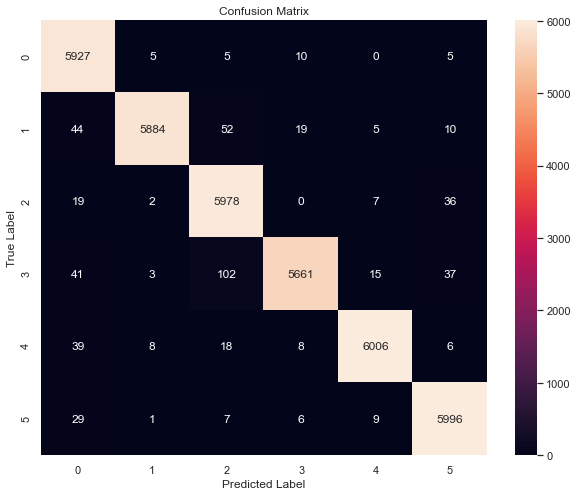

In [213]:
 
cm= confusion_matrix(y_test, y_pred)
class_label = [0,1,2,3,4,5]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)

    # Plot the Model
plt.figure(figsize=(10,8))

sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
# 

In [212]:
print(classification_report(y_test, y_pred_clf))

              precision    recall  f1-score   support

           0       0.81      0.13      0.22      5952
           1       0.22      0.97      0.35      6014
           2       0.91      0.15      0.26      6042
           3       0.93      0.20      0.33      5859
           4       0.94      0.68      0.79      6085
           5       0.89      0.21      0.34      6048

    accuracy                           0.39     36000
   macro avg       0.78      0.39      0.38     36000
weighted avg       0.78      0.39      0.38     36000



In [194]:
# # a pipleline for the models
# pipeline1 = Pipeline([('tree',DecisionTreeClassifier(max_depth=10, min_samples_leaf=3 , min_samples_split= 100))]) 
# #pipeline2 = Pipeline([('forest', RandomForestClassifier(n_estimators=2, random_state= 2))])


In [211]:
# pipeline1.fit_transform(X_train, y_train)
# pipeline1.score(X_test, y_test)
# y_pred= pipeline1.predict(X_test)
# print(classification_report(y_test, y_pred))

In [ ]:
# random forest, knn reg, BOOST these using  
# HAC, KMEANS, RNN, 